In [1]:
!pip install spotipy

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np

# Initializing SpotiPy with user credentias
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="426e22a5ddc84900acb6d605bb0a2cdf",
                                                           client_secret="a49cdbf32d6c46beb53c014afad4078f"))

In [3]:
# Defining the functions to obtain 1) songs & artists, and 2) audio features

def get_id_song_artist(username, playlist_id):
    # Getting all tracks in the playlist
    results = sp.user_playlist_tracks(username, playlist_id)
    tracks = results['items']

    # Continuing getting tracks until there are no more tracks to get
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])

    # Looping through each track and extract ID, song name, and artist name
    id_song_artist_list = []
    for track in tracks:
        track_info = track['track']
        if 'id' in track_info:
            track_id = track_info['id']
            track_name = track_info['name']
            artist_name = track_info['artists'][0]['name']
            id_song_artist_list.append({'id': track_id, 'name': track_name, 'artist': artist_name})

    # Converting the list of track IDs, song names, and artist names to a pandas dataframe and returning it
    return pd.DataFrame(id_song_artist_list)


def get_playlist_audio_features(playlist_id):
    # Function to get audio features for a list of track IDs
    def get_audio_features(track_ids):
        # Filtering out None values from track_ids list
        track_ids = [id for id in track_ids if id is not None]

        # Getting audio features for the track IDs
        features = sp.audio_features(tracks=track_ids)
        return features

    # Getting all tracks in the playlist
    audio_features = []

    # Getting the first batch of tracks
    results = sp.playlist_items(playlist_id, limit=100)

    # Continuing getting tracks in batches of 100 until there are no more tracks to get
    while results['items']:
        audio_features.extend(results['items'])
        results = sp.playlist_items(playlist_id, offset=len(audio_features), limit=100)

    # Splitting the playlist into batches of 100 tracks
    batches = [audio_features[i:i+100] for i in range(0, len(audio_features), 100)]

    # Looping through each batch and get audio features
    features_list = []
    for batch in batches:
        # Extracting track IDs from batch
        track_ids = [track['track']['id'] for track in batch if track['track'] is not None]

        # Getting audio features for the track IDs
        features = get_audio_features(track_ids)

        # Appending the features to the list
        features_list.extend(features)

    # Converting the list of features to a pandas dataframe and returining it
    return pd.DataFrame(features_list)

In [4]:
# Obtaining a collection of songs & artists, and audio features from a long Spotify playlist with many different types of genres

id_song_artist_df1 = get_id_song_artist("spotify", "6yPiKpy7evrwvZodByKvM9")
audio_features_df1 = get_playlist_audio_features("6yPiKpy7evrwvZodByKvM9")

merged_df1 = pd.merge(id_song_artist_df1, audio_features_df1, on='id', how='inner')
merged_df1.drop_duplicates(subset=['name'], keep='first', inplace=True)
merged_df1.dropna(inplace=True)

# Obtaining a collection of songs & artists, and audio features from a Spotify Pop playlist

id_song_artist_df2 = get_id_song_artist("spotify", "37i9dQZF1DX1ngEVM0lKrb")
audio_features_df2 = get_playlist_audio_features("37i9dQZF1DX1ngEVM0lKrb")

merged_df2 = pd.merge(id_song_artist_df2, audio_features_df2, on='id', how='inner')
merged_df2.drop_duplicates(subset=['name'], keep='first', inplace=True)
merged_df2.dropna(inplace=True)

# Obtaining a collection of songs & artists, and audio features from a Spotify Rock playlist

id_song_artist_df3 = get_id_song_artist("spotify", "37i9dQZF1DWXRqgorJj26U")
audio_features_df3 = get_playlist_audio_features("37i9dQZF1DWXRqgorJj26U")

merged_df3 = pd.merge(id_song_artist_df3, audio_features_df3, on='id', how='inner')
merged_df3.drop_duplicates(subset=['name'], keep='first', inplace=True)
merged_df3.dropna(inplace=True)

# Obtaining a collection of songs & artists, and audio features from a Spotify Latin playlist

id_song_artist_df4 = get_id_song_artist("spotify", "37i9dQZF1DXbLMw3ry7d7k")
audio_features_df4 = get_playlist_audio_features("37i9dQZF1DXbLMw3ry7d7k")

merged_df4 = pd.merge(id_song_artist_df4, audio_features_df4, on='id', how='inner')
merged_df4.drop_duplicates(subset=['name'], keep='first', inplace=True)
merged_df4.dropna(inplace=True)
merged_df4

# Obtaining a collection of songs & artists, and audio features from a Spotify Electronic/Dance playlist

id_song_artist_df5 = get_id_song_artist("spotify", "1dvoCOb3vso33rTd4FWqRW")
audio_features_df5 = get_playlist_audio_features("1dvoCOb3vso33rTd4FWqRW")

merged_df5 = pd.merge(id_song_artist_df5, audio_features_df5, on='id', how='inner')
merged_df5.drop_duplicates(subset=['name'], keep='first', inplace=True)
merged_df5.dropna(inplace=True)

# Obtaining a collection of songs & artists, and audio features from a Spotify Hip-Hop playlist

id_song_artist_df6 = get_id_song_artist("spotify", "6QY4S9npgtFDwd5egrtrGQ")
audio_features_df6 = get_playlist_audio_features("6QY4S9npgtFDwd5egrtrGQ")

merged_df6 = pd.merge(id_song_artist_df6, audio_features_df6, on='id', how='inner')
merged_df6.drop_duplicates(subset=['name'], keep='first', inplace=True)
merged_df6.dropna(inplace=True)

# Obtaining a collection of songs & artists, and audio features from a Spotify Indie playlist

id_song_artist_df7 = get_id_song_artist("spotify", "37i9dQZF1DX26DKvjp0s9M")
audio_features_df7 = get_playlist_audio_features("37i9dQZF1DX26DKvjp0s9M")

merged_df7 = pd.merge(id_song_artist_df7, audio_features_df7, on='id', how='inner')
merged_df7.drop_duplicates(subset=['name'], keep='first', inplace=True)
merged_df7.dropna(inplace=True)

# Obtaining a collection of songs & artists, and audio features from a Spotify Jazz playlist

id_song_artist_df8 = get_id_song_artist("spotify", "37i9dQZF1DXbITWG1ZJKYt")
audio_features_df8 = get_playlist_audio_features("37i9dQZF1DXbITWG1ZJKYt")

merged_df8 = pd.merge(id_song_artist_df8, audio_features_df8, on='id', how='inner')
merged_df8.drop_duplicates(subset=['name'], keep='first', inplace=True)
merged_df8.dropna(inplace=True)

# Obtaining a collection of songs & artists, and audio features from a Spotify Classical playlist

id_song_artist_df9 = get_id_song_artist("spotify", "37i9dQZF1DWWEJlAGA9gs0")
audio_features_df9 = get_playlist_audio_features("37i9dQZF1DWWEJlAGA9gs0")

merged_df9 = pd.merge(id_song_artist_df9, audio_features_df9, on='id', how='inner')
merged_df9.drop_duplicates(subset=['name'], keep='first', inplace=True)
merged_df9.dropna(inplace=True)

# Concatenating all previously obtained dataframes to the final dataframe and making some final arrangements

final_sp_df = pd.concat([merged_df1, merged_df2, merged_df3, merged_df4, merged_df5, merged_df6, merged_df7, merged_df8, merged_df9], axis=0, ignore_index=True)
final_sp_df.drop_duplicates(subset=['name'], keep='first', inplace=True)
final_sp_df = final_sp_df.set_index('id')
final_sp_df.drop(['type', 'uri', 'track_href', 'analysis_url'], axis=1, inplace=True)
final_sp_df

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
id,,,,,,,,,,,,,,,
33xMbeHzmWd6Od0BmLZEUs,2K,Nosaj Thing,0.3100,0.4450,7,-13.355,0,0.0863,0.0940,0.06780,0.1130,0.1220,95.360,152560,3
3UnyplmZaq547hwsfOR5yy,4 Billion Souls,The Doors,0.4190,0.5650,5,-11.565,1,0.0347,0.1370,0.33700,0.1280,0.6480,151.277,197707,4
1w8QCSDH4QobcQeT4uMKLm,4 Minute Warning,Radiohead,0.3540,0.3020,9,-13.078,1,0.0326,0.5900,0.07090,0.1110,0.2230,123.753,244285,4
7J9mBHG4J2eIfDAv5BehKA,7 Element,Vitas,0.7270,0.7850,5,-6.707,0,0.0603,0.3250,0.12600,0.3100,0.9600,129.649,249940,4
1VZedwJj1gyi88WFRhfThb,#9 Dream,R.E.M.,0.5710,0.7240,0,-5.967,1,0.0260,0.0231,0.00311,0.0919,0.3850,116.755,278320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4VVEfBXep7FdOt524jkfLF,"Young Birches, Op. 128, No. 2",Amy Beach,0.2400,0.0834,6,-29.545,0,0.0499,0.9780,0.94400,0.0804,0.1880,169.621,159320,4
7hOLwSaTSkrqxSMzj4bXI1,"Violin Concerto In D Major, Op. 35: III. Final...",Erich Wolfgang Korngold,0.4050,0.3180,9,-17.140,1,0.0565,0.9380,0.72300,0.2840,0.3420,151.434,424653,4
76i4IBw3KsuDw783tvHB0e,"Tahiti Trot, Op. 16 (orchestral transcription ...",Dmitri Shostakovich,0.2910,0.0981,8,-23.156,1,0.0398,0.9500,0.86500,0.2750,0.1940,138.168,249640,4


In [5]:
# Making a copy of the dataframe to scale continuous numerical features, choose the best K, and apply KMeans

final_scaled_sp_df = final_sp_df.copy()

# Scaling the continuous numerical columns in the copy of the dataframe

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols_to_scale = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
final_scaled_sp_df[cols_to_scale] = scaler.fit_transform(final_sp_df[cols_to_scale])

In [6]:
# Choosing the best K

!pip install yellowbrick

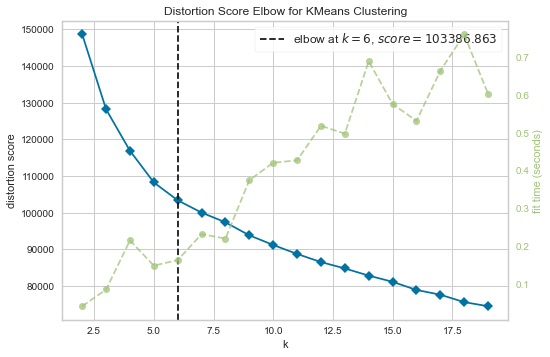

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

num_cols = final_scaled_sp_df.select_dtypes(include=['float64', 'int64']).columns
num_df = final_scaled_sp_df[num_cols]

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20))

visualizer.fit(num_df)

visualizer.show()

In [8]:
# Clustering the data and adding the cluster information to the unscaled dataframe that will be used for future purposes

kmeans = KMeans(n_clusters=6, random_state=42)

kmeans.fit(num_df)

cluster_labels = kmeans.predict(num_df)

final_sp_df['clusters'] = cluster_labels

final_sp_df.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,clusters
id,,,,,,,,,,,,,,,,
33xMbeHzmWd6Od0BmLZEUs,2K,Nosaj Thing,0.310,0.445,7,-13.355,0,0.0863,0.0940,0.06780,0.1130,0.122,95.360,152560,3,2
3UnyplmZaq547hwsfOR5yy,4 Billion Souls,The Doors,0.419,0.565,5,-11.565,1,0.0347,0.1370,0.33700,0.1280,0.648,151.277,197707,4,1
1w8QCSDH4QobcQeT4uMKLm,4 Minute Warning,Radiohead,0.354,0.302,9,-13.078,1,0.0326,0.5900,0.07090,0.1110,0.223,123.753,244285,4,2
7J9mBHG4J2eIfDAv5BehKA,7 Element,Vitas,0.727,0.785,5,-6.707,0,0.0603,0.3250,0.12600,0.3100,0.960,129.649,249940,4,1
1VZedwJj1gyi88WFRhfThb,#9 Dream,R.E.M.,0.571,0.724,0,-5.967,1,0.0260,0.0231,0.00311,0.0919,0.385,116.755,278320,4,5


In [9]:
# Saving the unscaled dataframe with the songs assigned to each cluster

final_sp_df.to_csv('data/spotify_data.csv')